In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
import seaborn as sns

In [2]:
past = pd.read_excel('../3_res/Train Data.xlsx')
past.columns

Index(['TERM', 'CRS_ID', 'INST_COUNT', 'CRS_AT_HRS', 'NET_CRS_REVENUE', 'CWID', 'STU_LEV_C', 'STU_LEV_D', 'STU_LEV_G', 'STU_LEV_P',
       ...
       'FDB_Dept_Theatre Arts', 'FDB_Dept_University Library', 'FDB_Dept_Visual Arts', 'SCCH_RATIO', 'FDB_Dept', 'FDB_College', 'FY', 'yearly_rev', 'SCCH_RATIO_DEPT', 'yearly_rev_dist'], dtype='object', length=124)

In [3]:
current = pd.read_excel('../3_res/FY21 Students for merge.xlsx')

In [4]:
current.head()

,CRS_ID,CRS_AT_HRS,Enrollment,STU_LEV_C,STU_LEV_D,STU_LEV_G,STU_LEV_P,STU_LEV_U,STU_COHORT_A,STU_COHORT_E,STU_COHORT_G,STU_COHORT_H,STU_COHORT_Other,STU_DEPT_Accounting,STU_DEPT_BU,STU_DEPT_Biology,STU_DEPT_CAS,STU_DEPT_Chemistry,STU_DEPT_Communication,STU_DEPT_Computer Science,STU_DEPT_Counseling,STU_DEPT_Criminal Justice,STU_DEPT_Design,STU_DEPT_Economics,STU_DEPT_English,STU_DEPT_Environment,STU_DEPT_Exchange,STU_DEPT_Finance,STU_DEPT_History,STU_DEPT_Honors,STU_DEPT_LIM,STU_DEPT_Languages,STU_DEPT_Law,STU_DEPT_Management,STU_DEPT_Marketing,STU_DEPT_Math,STU_DEPT_Music,STU_DEPT_Music Industry,STU_DEPT_Nursing,STU_DEPT_Philosophy,STU_DEPT_Physics,STU_DEPT_Political Science,STU_DEPT_Psychology,STU_DEPT_Religious Studies,STU_DEPT_Sociology,STU_DEPT_Studio Art,STU_DEPT_Teacher Education,STU_DEPT_Theatre,STU_COL_BU,STU_COL_CAS,STU_COL_CMM,STU_COL_CNH,STU_COL_LAW
0,ACCTB202001,114.0,38,0,0,0,0,38,0,38,0,0,0,0,3,1,0,0,0,0,0,1,0,3,0,0,0,3,0,0,0,0,0,14,9,0,0,2,0,0,0,0,0,0,1,0,0,1,32,3,3,0,0
1,ACCTB202002,72.0,24,0,0,0,0,24,0,24,0,0,0,1,0,1,0,0,0,1,0,0,0,3,0,0,0,3,0,0,0,0,0,6,7,0,0,0,0,0,0,1,0,0,0,0,0,1,20,3,1,0,0
2,ACCTB202003,120.0,40,0,0,0,0,40,0,40,0,0,0,1,2,0,0,0,1,3,0,0,0,6,1,0,0,3,0,0,0,0,0,13,7,0,0,1,0,0,0,0,1,0,0,0,0,1,32,6,2,0,0
3,ACCTB203001,123.0,41,0,0,0,0,41,0,41,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,8,0,0,0,0,0,19,11,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0
4,ACCTB300001,48.0,16,0,0,0,0,16,0,16,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15,0,1,0,0


In [5]:
# drop variables not in current
past.drop(['INST_COUNT', 'NET_CRS_REVENUE', 'STU_DEPT_City College', 'STU_COL_Other', 'FDB_College_BU', 
              'FDB_College_CAS', 'FDB_College_CMM', 'FDB_College_CNH', 'FDB_College_LAW', 'FDB_College_Others', 
              'FDB_Dept_Accounting', 'FDB_Dept_Biology', 'FDB_Dept_Chemistry', 'FDB_Dept_Classical Studies', 
              'FDB_Dept_College of Law', 'FDB_Dept_Computer Sciences', 'FDB_Dept_Counseling', 'FDB_Dept_Criminal Justice', 
              'FDB_Dept_Criminology', 'FDB_Dept_Criminology and Justice', 'FDB_Dept_Department of Art', 'FDB_Dept_Design', 
              'FDB_Dept_Digital Filmmaking', 'FDB_Dept_Economics', 'FDB_Dept_English', 'FDB_Dept_Environment', 
              'FDB_Dept_Film', 'FDB_Dept_Finance', 'FDB_Dept_Food Studies', 'FDB_Dept_History', 'FDB_Dept_Honors', 
              'FDB_Dept_International Business', 'FDB_Dept_Jesuit Social Research Inst', 'FDB_Dept_LIM', 
              'FDB_Dept_Languages and Cultures', 'FDB_Dept_Law Clinic', 'FDB_Dept_Law Library', 
              'FDB_Dept_Loyola Institute for Ministry', 'FDB_Dept_MUIN', 'FDB_Dept_Magis Enrichment', 
              'FDB_Dept_Management', 'FDB_Dept_Marketing', 'FDB_Dept_Mathematical Sciences', 'FDB_Dept_Music', 
              'FDB_Dept_Music Prep', 'FDB_Dept_Philosophy', 'FDB_Dept_Physics', 'FDB_Dept_Political Science', 
              'FDB_Dept_Portfolio', 'FDB_Dept_Psychology', 'FDB_Dept_Religious Studies', 
              'FDB_Dept_School of Mass Communication', 'FDB_Dept_School of Nursing', 'FDB_Dept_SoMC', 'FDB_Dept_Sociology', 
              'FDB_Dept_Student Success', 'FDB_Dept_Studio Art', 'FDB_Dept_Teach', 'FDB_Dept_Teacher Certification', 
              'FDB_Dept_Theater Arts and Dance', 'FDB_Dept_Theatre Arts', 'FDB_Dept_University Library', 
              'FDB_Dept_Visual Arts', 'SCCH_RATIO', 'FDB_Dept', 'FDB_College', 'yearly_rev', 'SCCH_RATIO_DEPT'], 
             axis =1, inplace=True)

past.columns

Index(['TERM', 'CRS_ID', 'CRS_AT_HRS', 'CWID', 'STU_LEV_C', 'STU_LEV_D', 'STU_LEV_G', 'STU_LEV_P', 'STU_LEV_U', 'STU_COHORT_A', 'STU_COHORT_E', 'STU_COHORT_G', 'STU_COHORT_H', 'STU_COHORT_Other', 'STU_DEPT_Accounting', 'STU_DEPT_BU', 'STU_DEPT_Biology', 'STU_DEPT_CAS', 'STU_DEPT_Chemistry', 'STU_DEPT_Communication', 'STU_DEPT_Computer Science', 'STU_DEPT_Counseling', 'STU_DEPT_Criminal Justice', 'STU_DEPT_Design', 'STU_DEPT_Economics', 'STU_DEPT_English', 'STU_DEPT_Environment', 'STU_DEPT_Exchange', 'STU_DEPT_Finance', 'STU_DEPT_History', 'STU_DEPT_LIM', 'STU_DEPT_Languages', 'STU_DEPT_Law', 'STU_DEPT_Management', 'STU_DEPT_Marketing', 'STU_DEPT_Math', 'STU_DEPT_Music', 'STU_DEPT_Music Industry', 'STU_DEPT_Nursing', 'STU_DEPT_Philosophy', 'STU_DEPT_Physics', 'STU_DEPT_Political Science', 'STU_DEPT_Psychology', 'STU_DEPT_Religious Studies', 'STU_DEPT_Sociology', 'STU_DEPT_Studio Art', 'STU_DEPT_Teacher Education', 'STU_DEPT_Theatre', 'STU_COL_BU', 'STU_COL_CAS', 'STU_COL_CMM',
       'S

In [6]:
past.rename(columns={'CWID':'Enrollment'}, inplace=True)
current['TERM']='2020F'

a = past.columns.values.tolist()
b = current.columns.values.tolist()

set(a).intersection(b)

{'CRS_AT_HRS',
 'CRS_ID',
 'Enrollment',
 'STU_COHORT_A',
 'STU_COHORT_E',
 'STU_COHORT_G',
 'STU_COHORT_H',
 'STU_COHORT_Other',
 'STU_COL_BU',
 'STU_COL_CAS',
 'STU_COL_CMM',
 'STU_COL_CNH',
 'STU_COL_LAW',
 'STU_DEPT_Accounting',
 'STU_DEPT_BU',
 'STU_DEPT_Biology',
 'STU_DEPT_CAS',
 'STU_DEPT_Chemistry',
 'STU_DEPT_Communication',
 'STU_DEPT_Computer Science',
 'STU_DEPT_Counseling',
 'STU_DEPT_Criminal Justice',
 'STU_DEPT_Design',
 'STU_DEPT_Economics',
 'STU_DEPT_English',
 'STU_DEPT_Environment',
 'STU_DEPT_Exchange',
 'STU_DEPT_Finance',
 'STU_DEPT_History',
 'STU_DEPT_LIM',
 'STU_DEPT_Languages',
 'STU_DEPT_Law',
 'STU_DEPT_Management',
 'STU_DEPT_Marketing',
 'STU_DEPT_Math',
 'STU_DEPT_Music',
 'STU_DEPT_Music Industry',
 'STU_DEPT_Nursing',
 'STU_DEPT_Philosophy',
 'STU_DEPT_Physics',
 'STU_DEPT_Political Science',
 'STU_DEPT_Psychology',
 'STU_DEPT_Religious Studies',
 'STU_DEPT_Sociology',
 'STU_DEPT_Studio Art',
 'STU_DEPT_Teacher Education',
 'STU_DEPT_Theatre',
 'STU_

In [7]:
past['TERM'].value_counts(dropna=False)

2019F    1396
2018F    1337
2017F    1278
Name: TERM, dtype: int64

In [14]:
past.drop(['env', 'FY'], axis=1, inplace = True) #env capyured in environment, FY is term
past.head()

,TERM,CRS_ID,CRS_AT_HRS,Enrollment,STU_LEV_C,STU_LEV_D,STU_LEV_G,STU_LEV_P,STU_LEV_U,STU_COHORT_A,STU_COHORT_E,STU_COHORT_G,STU_COHORT_H,STU_COHORT_Other,STU_DEPT_Accounting,STU_DEPT_BU,STU_DEPT_Biology,STU_DEPT_CAS,STU_DEPT_Chemistry,STU_DEPT_Communication,STU_DEPT_Computer Science,STU_DEPT_Counseling,STU_DEPT_Criminal Justice,STU_DEPT_Design,STU_DEPT_Economics,STU_DEPT_English,STU_DEPT_Environment,STU_DEPT_Exchange,STU_DEPT_Finance,STU_DEPT_History,STU_DEPT_LIM,STU_DEPT_Languages,STU_DEPT_Law,STU_DEPT_Management,STU_DEPT_Marketing,STU_DEPT_Math,STU_DEPT_Music,STU_DEPT_Music Industry,STU_DEPT_Nursing,STU_DEPT_Philosophy,STU_DEPT_Physics,STU_DEPT_Political Science,STU_DEPT_Psychology,STU_DEPT_Religious Studies,STU_DEPT_Sociology,STU_DEPT_Studio Art,STU_DEPT_Teacher Education,STU_DEPT_Theatre,STU_COL_BU,STU_COL_CAS,STU_COL_CMM,STU_COL_CNH,STU_COL_LAW,yearly_rev_dist
0,2017F,ACCTB202001,66.0,22,0,0,0,0,22,0,22,0,0,0,1,3,0,0,0,0,0,0,0,0,2,0,0,0,3,0,0,0,0,9,1,0,0,2,0,0,0,0,0,0,0,0,0,1,19,0,3,0,0,71879.810120
1,2017F,ACCTB202002,78.0,26,0,0,0,0,26,0,26,0,0,0,0,2,1,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,0,8,1,0,1,9,0,0,0,0,0,0,0,0,0,0,14,1,10,0,0,84948.866506
2,2017F,ACCTB202003,78.0,26,0,0,0,0,26,0,26,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,7,7,0,0,5,0,0,0,0,0,0,0,0,0,0,21,0,5,0,0,84948.866506
3,2017F,ACCTB203001,66.0,22,0,0,0,0,22,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,5,0,0,0,0,8,6,0,0,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0,71879.810120
4,2017F,ACCTB203002,48.0,16,0,0,0,0,16,1,15,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,52276.225542


In [15]:
len(past.columns)

54

In [16]:
#current.set_index(['TERM', 'CRS_ID'], inplace=True)
current.head()

,CRS_ID,CRS_AT_HRS,Enrollment,STU_LEV_C,STU_LEV_D,STU_LEV_G,STU_LEV_P,STU_LEV_U,STU_COHORT_A,STU_COHORT_E,STU_COHORT_G,STU_COHORT_H,STU_COHORT_Other,STU_DEPT_Accounting,STU_DEPT_BU,STU_DEPT_Biology,STU_DEPT_CAS,STU_DEPT_Chemistry,STU_DEPT_Communication,STU_DEPT_Computer Science,STU_DEPT_Counseling,STU_DEPT_Criminal Justice,STU_DEPT_Design,STU_DEPT_Economics,STU_DEPT_English,STU_DEPT_Environment,STU_DEPT_Exchange,STU_DEPT_Finance,STU_DEPT_History,STU_DEPT_Honors,STU_DEPT_LIM,STU_DEPT_Languages,STU_DEPT_Law,STU_DEPT_Management,STU_DEPT_Marketing,STU_DEPT_Math,STU_DEPT_Music,STU_DEPT_Music Industry,STU_DEPT_Nursing,STU_DEPT_Philosophy,STU_DEPT_Physics,STU_DEPT_Political Science,STU_DEPT_Psychology,STU_DEPT_Religious Studies,STU_DEPT_Sociology,STU_DEPT_Studio Art,STU_DEPT_Teacher Education,STU_DEPT_Theatre,STU_COL_BU,STU_COL_CAS,STU_COL_CMM,STU_COL_CNH,STU_COL_LAW,TERM
0,ACCTB202001,114.0,38,0,0,0,0,38,0,38,0,0,0,0,3,1,0,0,0,0,0,1,0,3,0,0,0,3,0,0,0,0,0,14,9,0,0,2,0,0,0,0,0,0,1,0,0,1,32,3,3,0,0,2020F
1,ACCTB202002,72.0,24,0,0,0,0,24,0,24,0,0,0,1,0,1,0,0,0,1,0,0,0,3,0,0,0,3,0,0,0,0,0,6,7,0,0,0,0,0,0,1,0,0,0,0,0,1,20,3,1,0,0,2020F
2,ACCTB202003,120.0,40,0,0,0,0,40,0,40,0,0,0,1,2,0,0,0,1,3,0,0,0,6,1,0,0,3,0,0,0,0,0,13,7,0,0,1,0,0,0,0,1,0,0,0,0,1,32,6,2,0,0,2020F
3,ACCTB203001,123.0,41,0,0,0,0,41,0,41,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,8,0,0,0,0,0,19,11,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0,2020F
4,ACCTB300001,48.0,16,0,0,0,0,16,0,16,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15,0,1,0,0,2020F


In [18]:
len(current.columns) #drop honors later

54

# Random Forest Regressor

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [20]:
X = past.drop('yearly_rev_dist', axis=1)
y = past[['CRS_ID', 'TERM', 'yearly_rev_dist']]

In [21]:
X_train = X[X['TERM']!='2019F']
X_test = X[X['TERM']=='2019F']
y_train = y[y['TERM']!='2019F']
y_test = y[y['TERM']=='2019F']

In [22]:
X_train.set_index(['TERM', 'CRS_ID'], inplace=True)
X_test.set_index(['TERM', 'CRS_ID'], inplace=True)
y_train.set_index(['TERM', 'CRS_ID'], inplace=True)
y_test.set_index(['TERM', 'CRS_ID'], inplace=True)

In [23]:
r_reg = RandomForestRegressor(random_state=42)
r_reg.fit(X_train, y_train)
y_pred = r_reg.predict(X_test) 

In [24]:
y_pred

array([88140.35772917, 83244.38388499, 28063.31923339, ...,
        2544.89857795, 26890.47964288,  5244.23244186])

In [25]:
y_test['y_pred']=y_pred
y_test

yearly_rev_dist        y_pred
TERM  CRS_ID                                    
2019F ACCTB202001     96031.655263  88140.357729
      ACCTB202002     99461.357237  83244.383885
      ACCTB202003     30867.317763  28063.319233
      ACCTB202WZ1     20578.211842  17699.819410
      ACCTB202YZ1     17148.509868  14024.695465
...                            ...           ...
      VISAA349001     28788.853542  24096.897921
      VISAA373001     35186.376552  30422.243094
      VISAA445001      3198.761505   2544.898578
      VISAA450001     31987.615047  26890.479643
      VISAA457051      6397.523009   5244.232442

[1396 rows x 2 columns]

In [26]:
from sklearn.metrics import r2_score,mean_squared_error

In [27]:
y_test[pd.isna(y_test['yearly_rev_dist'])]

,,yearly_rev_dist,y_pred
TERM,CRS_ID,,
2019F,SPSTA230001,NaN,0.0


In [28]:
y_test[pd.isna(y_test['y_pred'])]

,,yearly_rev_dist,y_pred
TERM,CRS_ID,,


In [29]:
rf_test = y_test.dropna()

In [30]:
rmse = np.sqrt(mean_squared_error(rf_test['y_pred'], rf_test['yearly_rev_dist']))

In [31]:
rmse

6789.5350948036885

In [32]:
rf_test[['yearly_rev_dist', 'y_pred']].describe()

,yearly_rev_dist,y_pred
count,1395.000000,1395.000000
mean,44301.752996,42594.074499
std,54730.884320,52253.452654
min,0.000000,0.000000
25%,7135.988897,6673.583470
50%,30301.019114,30233.163066
75%,64341.646093,60583.670162
max,485662.228100,448663.137238


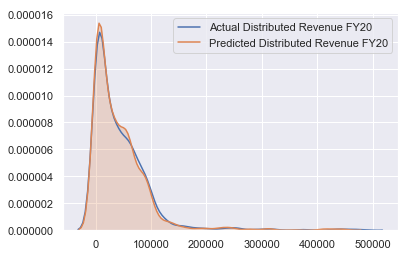

In [33]:
sns.set(style="darkgrid")
sns.kdeplot(rf_test['yearly_rev_dist'], label = 'Actual Distributed Revenue FY20' );
sns.kdeplot(rf_test['y_pred'], label = 'Predicted Distributed Revenue FY20', shade=True );

**Try Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
l_pred = l_reg.predict(X_test) 

In [36]:
y_test['l_pred']=l_pred
y_test

yearly_rev_dist        y_pred        l_pred
TERM  CRS_ID                                                  
2019F ACCTB202001     96031.655263  88140.357729  83340.854755
      ACCTB202002     99461.357237  83244.383885  88714.354755
      ACCTB202003     30867.317763  28063.319233  26899.018817
      ACCTB202WZ1     20578.211842  17699.819410  16899.354755
      ACCTB202YZ1     17148.509868  14024.695465  12985.448505
...                            ...           ...           ...
      VISAA349001     28788.853542  24096.897921  23900.479755
      VISAA373001     35186.376552  30422.243094  29885.729755
      VISAA445001      3198.761505   2544.898578   1665.667255
      VISAA450001     31987.615047  26890.479643  27262.729755
      VISAA457051      6397.523009   5244.232442   4510.104755

[1396 rows x 3 columns]

In [37]:
l_test = y_test.dropna()
#RMSE
np.sqrt(mean_squared_error(l_test['l_pred'], l_test['yearly_rev_dist']))

6491.818939217672

In [38]:
l_test[['yearly_rev_dist', 'l_pred']].describe()

,yearly_rev_dist,l_pred
count,1395.000000,1395.000000
mean,44301.752996,42955.560081
std,54730.884320,53012.997910
min,0.000000,-32306.770245
25%,7135.988897,6418.729755
50%,30301.019114,29885.729755
75%,64341.646093,62181.042255
max,485662.228100,459588.979755


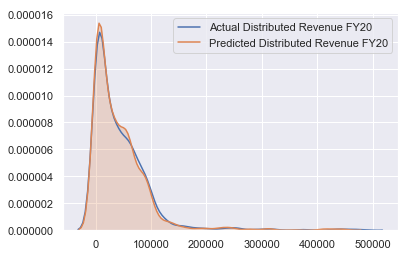

In [39]:
sns.set(style="darkgrid")
sns.kdeplot(l_test['yearly_rev_dist'], label = 'Actual Distributed Revenue FY20' );
sns.kdeplot(l_test['y_pred'], label = 'Predicted Distributed Revenue FY20', shade=True );

 # Predict for FY21
 **Use both linear and rf models**

In [40]:
past['yearly_rev_dist'][pd.isna(past['yearly_rev_dist'])]=0

In [41]:
train = past.drop('yearly_rev_dist', axis = 1)
train.set_index(['TERM', 'CRS_ID'], inplace=True)
train_y = past[['TERM', 'CRS_ID', 'yearly_rev_dist']]
train_y.set_index(['TERM', 'CRS_ID'], inplace=True)
predict = current
predict.set_index(['TERM', 'CRS_ID'], inplace=True)

In [42]:
predict['STU_DEPT_Honors'].sum() #add 6 to the number of students dropped from the analysis
# small number of students - shouldn't impact the final predictions

6

In [43]:
predict.drop('STU_DEPT_Honors', axis=1, inplace=True)

In [44]:
rf = RandomForestRegressor(random_state=42)
rf.fit(train, train_y)
rf_pred = rf.predict(predict)

lr = LinearRegression()
lr.fit(train, train_y)
lr_pred = lr.predict(predict)

predict['rf_pred']=rf_pred
predict['lr_pred']=lr_pred

predict.head()

CRS_AT_HRS  Enrollment  STU_LEV_C  STU_LEV_D  STU_LEV_G  STU_LEV_P  STU_LEV_U  STU_COHORT_A  STU_COHORT_E  STU_COHORT_G  STU_COHORT_H  STU_COHORT_Other  STU_DEPT_Accounting  STU_DEPT_BU  STU_DEPT_Biology  STU_DEPT_CAS  STU_DEPT_Chemistry  STU_DEPT_Communication  STU_DEPT_Computer Science  STU_DEPT_Counseling  STU_DEPT_Criminal Justice  STU_DEPT_Design  STU_DEPT_Economics  STU_DEPT_English  STU_DEPT_Environment  STU_DEPT_Exchange  STU_DEPT_Finance  STU_DEPT_History  STU_DEPT_LIM  STU_DEPT_Languages  STU_DEPT_Law  STU_DEPT_Management  STU_DEPT_Marketing  STU_DEPT_Math  STU_DEPT_Music  STU_DEPT_Music Industry  STU_DEPT_Nursing  STU_DEPT_Philosophy  STU_DEPT_Physics  STU_DEPT_Political Science  STU_DEPT_Psychology  STU_DEPT_Religious Studies  STU_DEPT_Sociology  STU_DEPT_Studio Art  STU_DEPT_Teacher Education  STU_DEPT_Theatre  STU_COL_BU  STU_COL_CAS  STU_COL_CMM  STU_COL_CNH  STU_COL_LAW        rf_pred        lr_pred
TERM  CRS_ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
2020F ACCTB202001       114.0          38          0          0          0          0         38             0            38             0             0                 0                    0            3                 1             0                   0                       0                          0                    0                          1                0                   3                 0                     0                  0                 3                 0             0                   0             0                   14                   9              0               0                        2                 0                    0                 0                           0                    0                           0                   1                    0                           0                 1          32            3            3            0            0  129202.007071  115466.721954
      ACCTB202002        72.0          24          0          0          0          0         24             0            24             0             0                 0                    1            0                 1             0                   0                       0                          1                    0                          0                0                   3                 0                     0                  0                 3                 0             0                   0             0                    6                   7              0               0                        0                 0                    0                 0                           1                    0                           0                   0                    0                           0                 1          20            3            1            0            0   77612.151367   73300.284454
      ACCTB202003       120.0          40          0          0          0          0         40             0            40             0             0                 0                    1            2                 0     

In [45]:
predict[['rf_pred', 'lr_pred']].describe()

,rf_pred,lr_pred
count,1319.000000,1.319000e+03
mean,49708.229217,9.059628e+10
std,54814.730877,1.036919e+12
min,0.000000,-3.116765e+04
25%,9014.555104,8.833441e+03
50%,36603.211154,3.804147e+04
75%,73992.548171,7.579310e+04
max,461611.357010,1.194964e+13


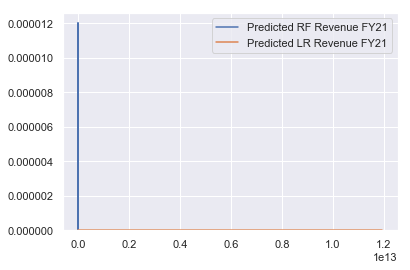

In [47]:
sns.set(style="darkgrid")
sns.kdeplot(predict['rf_pred'], label = 'Predicted RF Revenue FY21' );
sns.kdeplot(predict['lr_pred'], label = 'Predicted LR Revenue FY21', shade=True );

In [48]:
predict

CRS_AT_HRS  Enrollment  STU_LEV_C  STU_LEV_D  STU_LEV_G  STU_LEV_P  STU_LEV_U  STU_COHORT_A  STU_COHORT_E  STU_COHORT_G  STU_COHORT_H  STU_COHORT_Other  STU_DEPT_Accounting  STU_DEPT_BU  STU_DEPT_Biology  STU_DEPT_CAS  STU_DEPT_Chemistry  STU_DEPT_Communication  STU_DEPT_Computer Science  STU_DEPT_Counseling  STU_DEPT_Criminal Justice  STU_DEPT_Design  STU_DEPT_Economics  STU_DEPT_English  STU_DEPT_Environment  STU_DEPT_Exchange  STU_DEPT_Finance  STU_DEPT_History  STU_DEPT_LIM  STU_DEPT_Languages  STU_DEPT_Law  STU_DEPT_Management  STU_DEPT_Marketing  STU_DEPT_Math  STU_DEPT_Music  STU_DEPT_Music Industry  STU_DEPT_Nursing  STU_DEPT_Philosophy  STU_DEPT_Physics  STU_DEPT_Political Science  STU_DEPT_Psychology  STU_DEPT_Religious Studies  STU_DEPT_Sociology  STU_DEPT_Studio Art  STU_DEPT_Teacher Education  STU_DEPT_Theatre  STU_COL_BU  STU_COL_CAS  STU_COL_CMM  STU_COL_CNH  STU_COL_LAW        rf_pred        lr_pred
TERM  CRS_ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
2020F ACCTB202001       114.0          38          0          0          0          0         38             0            38             0             0                 0                    0            3                 1             0                   0                       0                          0                    0                          1                0                   3                 0                     0                  0                 3                 0             0                   0             0                   14                   9              0               0                        2                 0                    0                 0                           0                    0                           0                   1                    0                           0                 1          32            3            3            0            0  129202.007071  115466.721954
      ACCTB202002        72.0          24          0          0          0          0         24             0            24             0             0                 0                    1            0                 1             0                   0                       0                          1                    0                          0                0                   3                 0                     0                  0                 3                 0             0                   0             0                    6                   7              0               0                        0                 0                    0                 0                           1                    0                           0                   0                    0                           0                 1          20            3            1            0            0   77612.151367   73300.284454
      ACCTB202003       120.0          40          0          0          0          0         40             0            40             0             0                 0                    1            2                 0     

In [49]:
predict.reset_index(inplace=True)
predict['CRS_ID'].count()

1319

In [50]:
predict.head()

,TERM,CRS_ID,CRS_AT_HRS,Enrollment,STU_LEV_C,STU_LEV_D,STU_LEV_G,STU_LEV_P,STU_LEV_U,STU_COHORT_A,STU_COHORT_E,STU_COHORT_G,STU_COHORT_H,STU_COHORT_Other,STU_DEPT_Accounting,STU_DEPT_BU,STU_DEPT_Biology,STU_DEPT_CAS,STU_DEPT_Chemistry,STU_DEPT_Communication,STU_DEPT_Computer Science,STU_DEPT_Counseling,STU_DEPT_Criminal Justice,STU_DEPT_Design,STU_DEPT_Economics,STU_DEPT_English,STU_DEPT_Environment,STU_DEPT_Exchange,STU_DEPT_Finance,STU_DEPT_History,STU_DEPT_LIM,STU_DEPT_Languages,STU_DEPT_Law,STU_DEPT_Management,STU_DEPT_Marketing,STU_DEPT_Math,STU_DEPT_Music,STU_DEPT_Music Industry,STU_DEPT_Nursing,STU_DEPT_Philosophy,STU_DEPT_Physics,STU_DEPT_Political Science,STU_DEPT_Psychology,STU_DEPT_Religious Studies,STU_DEPT_Sociology,STU_DEPT_Studio Art,STU_DEPT_Teacher Education,STU_DEPT_Theatre,STU_COL_BU,STU_COL_CAS,STU_COL_CMM,STU_COL_CNH,STU_COL_LAW,rf_pred,lr_pred
0,2020F,ACCTB202001,114.0,38,0,0,0,0,38,0,38,0,0,0,0,3,1,0,0,0,0,0,1,0,3,0,0,0,3,0,0,0,0,14,9,0,0,2,0,0,0,0,0,0,1,0,0,1,32,3,3,0,0,129202.007071,115466.721954
1,2020F,ACCTB202002,72.0,24,0,0,0,0,24,0,24,0,0,0,1,0,1,0,0,0,1,0,0,0,3,0,0,0,3,0,0,0,0,6,7,0,0,0,0,0,0,1,0,0,0,0,0,1,20,3,1,0,0,77612.151367,73300.284454
2,2020F,ACCTB202003,120.0,40,0,0,0,0,40,0,40,0,0,0,1,2,0,0,0,1,3,0,0,0,6,1,0,0,3,0,0,0,0,13,7,0,0,1,0,0,0,0,1,0,0,0,0,1,32,6,2,0,0,131295.838205,119768.721954
3,2020F,ACCTB203001,123.0,41,0,0,0,0,41,0,41,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,8,0,0,0,0,19,11,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0,141467.588162,128024.596954
4,2020F,ACCTB300001,48.0,16,0,0,0,0,16,0,16,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15,0,1,0,0,50774.771383,48303.846954


In [51]:
FY21 = predict[['TERM', 'CRS_ID', 'CRS_AT_HRS', 'Enrollment', 'rf_pred', 'lr_pred']]
FY21.head()

,TERM,CRS_ID,CRS_AT_HRS,Enrollment,rf_pred,lr_pred
0,2020F,ACCTB202001,114.0,38,129202.007071,115466.721954
1,2020F,ACCTB202002,72.0,24,77612.151367,73300.284454
2,2020F,ACCTB202003,120.0,40,131295.838205,119768.721954
3,2020F,ACCTB203001,123.0,41,141467.588162,128024.596954
4,2020F,ACCTB300001,48.0,16,50774.771383,48303.846954


In [52]:
FY21.CRS_ID.count()

1319

In [53]:
FY21.CRS_ID.count() - FY21.CRS_ID.nunique()

0

In [54]:
FY21['lr_pred'].sum()

119496499058397.55

In [55]:
FY21['rf_pred'].sum()

65565154.337750204

In [56]:
FY21[['lr_pred', 'rf_pred']].describe() #use rf_pred

,lr_pred,rf_pred
count,1.319000e+03,1319.000000
mean,9.059628e+10,49708.229217
std,1.036919e+12,54814.730877
min,-3.116765e+04,0.000000
25%,8.833441e+03,9014.555104
50%,3.804147e+04,36603.211154
75%,7.579310e+04,73992.548171
max,1.194964e+13,461611.357010


In [57]:
FY21[FY21['lr_pred']>1000000] #crazy numbers - can't rely on this
# Since extreme values are high, use random forest predictions

,TERM,CRS_ID,CRS_AT_HRS,Enrollment,rf_pred,lr_pred
18,2020F,BA B100004,150.0,50,150146.419035,1.194964e+13
76,2020F,BIOLT121F05,69.0,23,61857.484585,1.194964e+13
191,2020F,COSCA211001,60.0,20,54836.197946,1.194964e+13
339,2020F,ENGLT122014,60.0,20,52301.712019,1.194964e+13
399,2020F,HISTQ234001,99.0,33,97695.339595,1.194964e+13
402,2020F,HISTQ250002,99.0,33,95663.205657,1.194964e+13
426,2020F,HISTT200002,99.0,33,93485.447538,1.194964e+13
428,2020F,HISTT256001,93.0,31,92450.328842,1.194964e+13
1112,2020F,POLSX259001,93.0,31,90502.948386,1.194964e+13
1117,2020F,PSYCA100002,96.0,32,88231.412678,1.194964e+13


In [58]:
FY21.drop('lr_pred', inplace=True, axis =1)

# Import Faculty Data and Merge

In [59]:
fac21 = pd.read_excel('../1_data/Faculty Course.xlsx', header=3)
fac21.fillna(method='ffill', inplace=True)
fac21 = fac21[['Course,College', 'Course,Dept of,Record', 'Instructor ID','Crs Sect ID', 'FDB_College', 'FDB_Dept']]
fac21.rename(columns = {'Course,College':'Course College','Course,Dept of,Record':'Course Dept','Instructor ID':'INST_ID', 
                        'Crs Sect ID':'CRS_ID'}, inplace=True)
fac21.head()

,Course College,Course Dept,INST_ID,CRS_ID,FDB_College,FDB_Dept
0,BU,ACCT,10147448.0,ACCTB300001,BU,Accounting
1,BU,ACCT,10222864.0,ACCTB202001,BU,Accounting
2,BU,ACCT,10222864.0,ACCTB305001,BU,Accounting
3,BU,ACCT,10222864.0,ACCTB306001,BU,Accounting
4,BU,ACCT,10222864.0,ACCTB310001,BU,Accounting


In [60]:
fac21['CRS_ID'].count()

1101

In [61]:
fac21.groupby(['INST_ID', 'CRS_ID']).ngroups - fac21['CRS_ID'].count()

-1

In [62]:
z_i = fac21.pivot_table(index=['INST_ID', 'CRS_ID'], aggfunc='size')
z_i = pd.DataFrame(z_i)
z_i = z_i[z_i[0]>1]
z_i.reset_index(inplace=True)
z_i['dups']=1
z_i.drop(0, axis=1,inplace=True)
z_i

,INST_ID,CRS_ID,dups
0,10119753.0,ARTHO160002,1


In [63]:
fac21[(fac21['INST_ID']==10119753.0) & (fac21['CRS_ID']=='ARTHO160002')]

,Course College,Course Dept,INST_ID,CRS_ID,FDB_College,FDB_Dept
1099,MA,VISA,10119753.0,ARTHO160002,MA,Department of Art
1100,Grand Total,VISA,10119753.0,ARTHO160002,MA,Department of Art


In [64]:
fac21=fac21[fac21['Course College']!='Grand Total']
fac21[(fac21['INST_ID']==10119753.0) & (fac21['CRS_ID']=='ARTHO160002')]

,Course College,Course Dept,INST_ID,CRS_ID,FDB_College,FDB_Dept
1099,MA,VISA,10119753.0,ARTHO160002,MA,Department of Art


In [65]:
fac21.groupby(['INST_ID', 'CRS_ID']).ngroups - fac21['CRS_ID'].count()

0

In [66]:
fac21['CRS_ID'].count()

1100

In [67]:
combined = fac21.merge(FY21, on='CRS_ID', how='outer', validate='m:1')

In [68]:
combined['CRS_ID'].nunique()

1328

In [69]:
combined['rf_pred'].sum()

66353755.567951456

In [70]:
combined['TERM'][pd.isna(combined['Course College'])].count()

247

In [71]:
z_i = combined.pivot_table(index=['CRS_ID'], aggfunc='size')
z_i = pd.DataFrame(z_i)
z_i = z_i[z_i[0]>1]
z_i.reset_index(inplace=True)
z_i.rename(columns={0:'dups'}, inplace=True)
#z_i.drop(0, axis=1,inplace=True)
z_i

,CRS_ID,dups
0,DSGNM200051,2
1,LAW L896003,2
2,LAW L897005,2
3,MUENM201051,2
4,MUPRM190051,2
5,NURSG945Y04,2
6,PFOLB100051,2
7,PFOLB200051,2
8,PFOLB300051,2
9,PFOLB400051,2


In [72]:
combined = combined.merge(z_i, on='CRS_ID', how='outer')

In [73]:
combined[pd.notna(combined['dups'])]

,Course College,Course Dept,INST_ID,CRS_ID,FDB_College,FDB_Dept,TERM,CRS_AT_HRS,Enrollment,rf_pred,dups
17,BU,BA,10191345.0,PFOLB100051,BU,Management,2020F,0.0,117.0,0.000000,2.0
18,BU,BA,10291522.0,PFOLB100051,BU,Management,2020F,0.0,117.0,0.000000,2.0
19,BU,BA,10191345.0,PFOLB200051,BU,Management,2020F,0.0,124.0,0.000000,2.0
20,BU,BA,10291522.0,PFOLB200051,BU,Management,2020F,0.0,124.0,0.000000,2.0
21,BU,BA,10191345.0,PFOLB300051,BU,Management,2020F,0.0,98.0,0.000000,2.0
22,BU,BA,10291522.0,PFOLB300051,BU,Management,2020F,0.0,98.0,0.000000,2.0
23,BU,BA,10191345.0,PFOLB400051,BU,Management,2020F,0.0,111.0,0.000000,2.0
24,BU,BA,10291522.0,PFOLB400051,BU,Management,2020F,0.0,111.0,0.000000,2.0
651,CNH,NURS,10082856.0,NURSG945Y04,CNH,School of Nursing,2020F,6.0,2.0,6773.235496,2.0
652,CNH,NURS,10305044.0,NURSG945Y04,CNH,School of Nursing,2020F,6.0,2.0,6773.235496,2.0


In [74]:
combined['dups'][pd.isna(combined['dups'])]=1
combined['rf_pred'] = combined['rf_pred']/combined['dups']

In [75]:
combined.drop('dups',axis=1, inplace=True)

In [76]:
combined.head()

,Course College,Course Dept,INST_ID,CRS_ID,FDB_College,FDB_Dept,TERM,CRS_AT_HRS,Enrollment,rf_pred
0,BU,ACCT,10147448.0,ACCTB300001,BU,Accounting,2020F,48.0,16.0,50774.771383
1,BU,ACCT,10222864.0,ACCTB202001,BU,Accounting,2020F,114.0,38.0,129202.007071
2,BU,ACCT,10222864.0,ACCTB305001,BU,Accounting,2020F,63.0,21.0,70101.188461
3,BU,ACCT,10222864.0,ACCTB306001,BU,Accounting,2020F,30.0,10.0,35099.197556
4,BU,ACCT,10222864.0,ACCTB310001,BU,Accounting,2020F,72.0,24.0,73392.292358


In [78]:
combined['rf_pred'].sum() 

65565154.33775021

In [79]:
combined.to_excel('../3_res/FY21 Projected Data.xlsx', index=False)